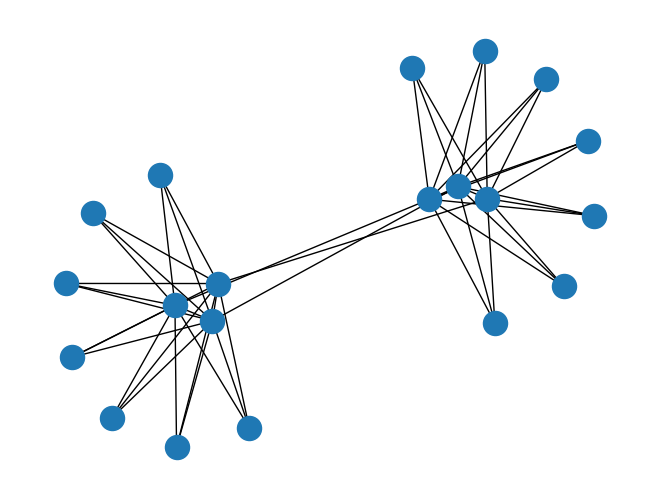

In [1]:
from turtle import up
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import torch_geometric.utils as utils
from utils import *
from model import UpdateRule


height = 2
width = 3
hidden_dim = 16

n_inputs = 7
n_outputs = 7


update_rule = UpdateRule(
    height,
    width,
    n_inputs, 
    n_outputs,
    hidden_dim,
    32
)
update_rule.draw()

In [2]:
from datasets import *
import copy
import numpy as np
np.set_printoptions(precision=3)

# dataset_loader = DataLoader(TranslateDataset(), batch_size=1, shuffle=True)

meta_set = MetaDataset()

optimizer = torch.optim.Adam(update_rule.parameters(), lr=0.0005)

best_loss = 10000
best_model = None

n_steps = 4
batch_size = 1
for epoch in range(10000):
    for _ in range(batch_size):
        for set_idx in meta_set.iterate():
            update_rule.reset() 
            x = update_rule.initial
            mask = torch.zeros_like(x)
            # mask[n_inputs + n_outputs:] = 1
            mask[-n_outputs:] = 1
            x = x * mask

        
            for idx, (problem_data_x, problem_data_y) in enumerate(meta_set.get_set(set_idx)):
                output_data = None#problem_data_y.float()
                if idx == meta_set.get_set_size() - 1:
                    output_data = None#problem_data_y.float()

                for i in range(n_steps):
                    # problem_data_x = torch.zeros_like(problem_data_x)
                    x = update_rule(x, problem_data_x.float(), output_data)
                    
                break
                
            network_output = update_rule.get_output(x)
            loss = F.mse_loss(problem_data_y.float().squeeze(0), network_output)
            
            loss.backward()  
    if loss < best_loss:
        best_model = copy.deepcopy(update_rule)
        best_loss = loss
        
    optimizer.step()  
    optimizer.zero_grad()  
        
    print(
        f"""\r Epoch {epoch * batch_size} | Loss {loss} | Network in: {problem_data_x.numpy()}| Network out: {network_output.detach().numpy()} """, end="")
    # print(f"\r Epoch {epoch * batch_size} | Loss {loss}", end="")
    
    if epoch % (100 // batch_size) == 0:
        print()


 Epoch 0 | Loss 0.12244897335767746 | Network in: [[0 0 0 1 0 0 0]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 100 | Loss 0.12244897335767746 | Network in: [[0 0 0 0 0 0 1]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 200 | Loss 0.12244897335767746 | Network in: [[0 0 0 1 0 0 0]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 300 | Loss 0.12244898080825806 | Network in: [[0 0 1 0 0 0 0]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 400 | Loss 0.12244898080825806 | Network in: [[0 1 0 0 0 0 0]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 500 | Loss 0.12244898080825806 | Network in: [[0 1 0 0 0 0 0]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 600 | Loss 0.12244898080825806 | Network in: [[0 0 0 0 0 1 0]]| Network out: [0.143 0.143 0.143 0.143 0.143 0.143 0.143] 
 Epoch 700 | Loss 0.12244897335767746 | Network in: [[0 0 0 0 0 0 1]]| Network out: [0.143 0.143 0.

KeyboardInterrupt: 

In [ ]:
best_model.initial

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0

In [ ]:
import numpy as np
np.set_printoptions(precision=3)

run_rule(torch.tensor([[0,0,0,1]]), update_rule)

In [ ]:
#save update_rule model dont use state dict
torch.save(update_rule, "update_rule.pt")


In [ ]:

def run_rule_meta(update_rule, training, test, n_steps):
    x = update_rule.initial
    for (problem_x, problem_y) in training:
        print(problem_x)
        for _ in range(n_steps):
            x = update_rule(x, problem_x.float(), problem_y.float())
            
            
    for _ in range(n_steps):
        x = update_rule(x, test.float())
        
    network_output = update_rule.get_output(x).detach()
    return network_output
    

In [ ]:
# run_rule_meta(update_rule, torch.tensor([
#     ([1,0,0,0], [0,1,0,0]),
#     ([0,1,0,0], [0,0,1,0]),
#     ([0,0,1,0], [0,0,0,1]),
#     ]), torch.tensor([0,1,0,0]), 8)

run_rule_meta(best_model, torch.tensor([
    ([1,0,0,0,0,0,0], [0,0,0,0,0,0,1]),
    ([0,1,0,0,0,0,0], [1,0,0,0,0,0,0]),
    ([0,0,1,0,0,0,0], [0,1,0,0,0,0,0]),
    ]), torch.tensor([0,0,1,0,0,0,0]), 8)

In [ ]:
best_loss

In [ ]:
n = 7
arr = torch.arange(n)

In [ ]:
data =  DataLoader(TranslateDataset() , batch_size=1, shuffle=True)

for sample in data:
    print(sample)

In [ ]:
from torch_geometric.nn import aggr
